## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

## Import Data

In [2]:
item = pd.read_csv("kendaraan_train_ori.csv")
item

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


## Pre-Procesing data

In [3]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [4]:
item.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [5]:
item.duplicated().sum()

0

In [6]:
item["Umur_Kendaraan"].replace("< 1 Tahun", 0, inplace=True)
item["Umur_Kendaraan"].replace("> 2 Tahun", 2, inplace=True)
item["Umur_Kendaraan"].replace("1-2 Tahun", 1, inplace=True)
item["Umur_Kendaraan"].replace(np.nan, '0', inplace=True)

item["Kendaraan_Rusak"].replace("Tidak", 0, inplace=True)
item["Kendaraan_Rusak"].replace("Pernah", 1, inplace=True)
item["Kendaraan_Rusak"].replace(np.nan, 0, inplace=True)


item["Jenis_Kelamin"].replace(np.nan, 1, inplace=True)
item["Jenis_Kelamin"].replace("Pria", 1, inplace=True)
item["Jenis_Kelamin"].replace("Wanita", 2 , inplace=True)

item['Umur'].fillna(int(item['Umur'].mean()), inplace=True)

item['SIM'].fillna(0, inplace = True)

item["Kode_Daerah"].fillna(0, inplace=True)

item["Sudah_Asuransi"].fillna(0, inplace=True)

item["Premi"].fillna(int(item['Premi'].mean()), inplace=True)

item["Lama_Berlangganan"].fillna(int(item['Lama_Berlangganan'].mean()), inplace=True)

item["Kanal_Penjualan"].fillna(0, inplace=True)

In [7]:
item = item.drop("id", axis=1)
item

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,2,30.0,1.0,33.0,1.0,0.0,0.0,28029.0,152.0,97.0,0
1,1,48.0,1.0,39.0,0.0,2.0,1.0,25800.0,29.0,158.0,0
2,1,21.0,1.0,46.0,1.0,0.0,0.0,32733.0,160.0,119.0,0
3,2,58.0,1.0,48.0,0.0,1.0,0.0,2630.0,124.0,63.0,0
4,1,50.0,1.0,35.0,0.0,2.0,0.0,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...
285826,2,23.0,1.0,4.0,1.0,0.0,0.0,25988.0,152.0,217.0,0
285827,2,21.0,1.0,46.0,1.0,0.0,0.0,44686.0,152.0,50.0,0
285828,2,23.0,1.0,50.0,1.0,0.0,0.0,49751.0,152.0,226.0,0
285829,1,68.0,1.0,7.0,1.0,1.0,0.0,30503.0,124.0,270.0,0


In [8]:
item = item.drop_duplicates()

## Memilih Atribut

<Axes: >

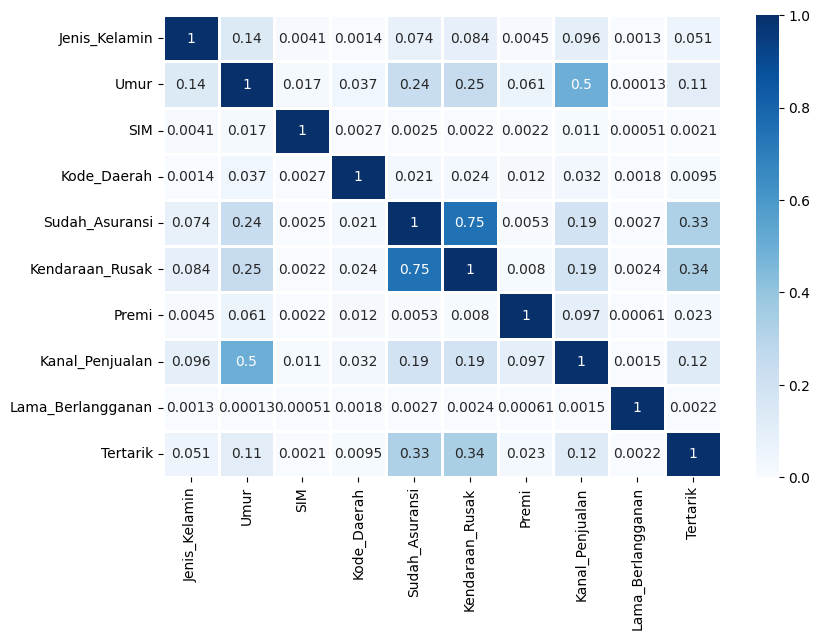

In [9]:
plt.figure(figsize = (9,6))
df_num = item._get_numeric_data()

sns.heatmap(df_num.corr().abs(), vmin=0, vmax=1, cmap="Blues", linewidths=1, annot=True)

In [10]:
d_temp = item[["Umur", "Kanal_Penjualan"]]

distortions = []
wcss = []
K = range(1,15)

for count in K :
    model = KMeans(count)
    model.fit(d_temp)
    wcss_iters = model.inertia_
    wcss.append(wcss_iters)

c:\Users\Boyang\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Boyang\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Boyang\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Boyang\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

In [11]:
tabelwcss = pd.DataFrame({'Nilai K' : K, "wcss" : wcss})
tabelwcss

,Nilai K,wcss
0,1,1.032920e+09
1,2,1.068042e+08
2,3,5.254190e+07
3,4,4.093294e+07
4,5,3.309291e+07
5,6,2.562872e+07
6,7,1.943814e+07
7,8,1.714638e+07
8,9,1.478298e+07
9,10,1.272219e+07


<function matplotlib.pyplot.show(close=None, block=None)>

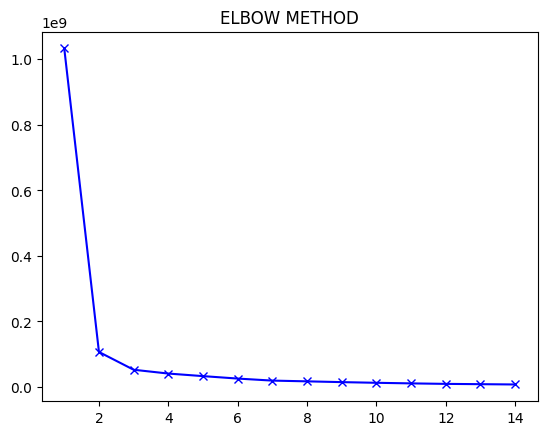

In [12]:
plt.plot(K,wcss,'bx-')
plt.title("ELBOW METHOD")
plt.show

In [13]:
k = 3
item = item.astype({"Umur": int, "Kode_Daerah": int,"Umur_Kendaraan" :int ,"Sudah_Asuransi":int})
item.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285592 entries, 0 to 285830
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      285592 non-null  int64  
 1   Umur               285592 non-null  int32  
 2   SIM                285592 non-null  float64
 3   Kode_Daerah        285592 non-null  int32  
 4   Sudah_Asuransi     285592 non-null  int32  
 5   Umur_Kendaraan     285592 non-null  int32  
 6   Kendaraan_Rusak    285592 non-null  float64
 7   Premi              285592 non-null  float64
 8   Kanal_Penjualan    285592 non-null  float64
 9   Lama_Berlangganan  285592 non-null  float64
 10  Tertarik           285592 non-null  int64  
dtypes: float64(5), int32(4), int64(2)
memory usage: 21.8 MB


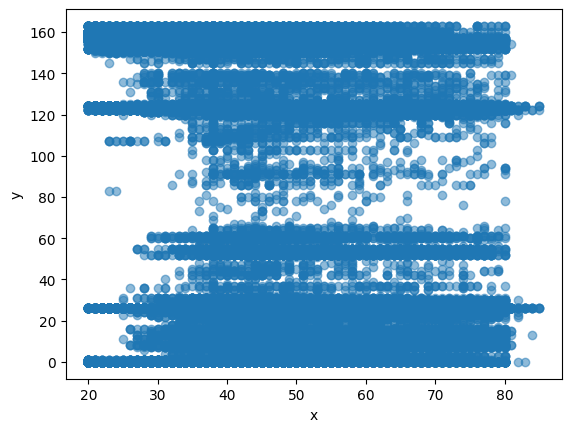

In [14]:
x = item["Umur"]
y = item["Kanal_Penjualan"]
plt.scatter(x, y, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Normalisasi Data

In [15]:
def maximum_absolute_scaling(df):
    df_scaled = df.copy()
    for column in df_scaled.columns:
        df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
    return df_scaled
d_normal = maximum_absolute_scaling(d_temp)

## Kmeans

In [16]:
class color:
  BLUE = '\033[95m'
  CYAN = '\033[96m'
  DARKCYAN = '\033[36m'
  BLUE = '\033[94m'
  GREEN = '\033[92m'
  YELLOW = '\033[93m'
  RED = '\033[91m'
  BOLD = '\033[1m'
  UNDERLNE = '\033[4m'
  END = '\033[0m'

In [17]:
def random_centroid(X, k):

  random_idx = [np.random.randint(len(X)) for i in range(k)]
  centroids = []
  for i in random_idx:
    centroids.append(X[i])
  return np.asarray(centroids)

def assign_cluster(X, ini_centroid, k):
  cluster = [] 
  for i in range(len(X)):
    euc_dist = [] 

    for j in range(k):
      euc_dist.append(np.linalg.norm(np.subtract(X[i], ini_centroid[j])))
    idx = np.argmin(euc_dist) 
    cluster.append(idx) 
  return np.asarray(cluster)

def compute_centroid(X, clusters, k):
  centroid = [] 
  for i in range(k):
    temp_arr = []
    for j in range(len(X)):
      
      if clusters[j] == i:
        temp_arr.append(X[j])

    centroid.append(np.mean(temp_arr, axis=0))
  return np.asarray(centroid)

def difference(prev, next):
  diff = 0
  for i in range(len(prev)):
    diff += np.linalg.norm(prev[i] - next[i])
  return diff

def show_clusters(X, clusters, centroid, ini_centroids=None, initial=True):

  cols ={0:'red', 1:'violet' ,2:'mediumpurple' , 3:'greenyellow', 4:'c', 5:'forestgreen', 6:'magenta', 7: 'coral'}

  centroid=np.asarray(centroid)
  ini_centroids = np.asarray(ini_centroids)

  u_cluster = np.unique(clusters)

  for i in u_cluster:

    cluster_name = 'Cluster ' + str(i+1)
    plt.scatter(X[clusters == i, 0], X[clusters == i , 1] , label = cluster_name, color=cols[i])

  plt.scatter(ini_centroids[:,0],ini_centroids[:,1], s=300,c='black',label='Initial Centroids')

  if initial:
    plt.scatter(centroid[:,0],centroid[:,1], s=300,c='orange',label='Final Centroids')

  plt.xlabel('PC A')
  plt.ylabel('PC B')
  plt.legend()
  plt.show()

def k_means(X, k, ini_cent=None, show_plots=True, random=True):

  if random:
    c_prev = random_centroid(X, k)
  else:
    c_prev = ini_cent 
  cluster = assign_cluster(X, c_prev, k)
  diff = 100 
  ini_centroid = c_prev 

  if show_plots:
    print(color.BOLD+'\nInitial Cluster Centers:\n'+color.END)
    print(ini_centroid)
    print(color.BOLD+"\n\nInitial Plot\n"+color.END)
    show_clusters(X, cluster, c_prev, ini_centroid, False)

  while diff > 0.0001:
    cluster = assign_cluster(X, c_prev, k) 
    c_new = compute_centroid(X, cluster, k)
    diff = difference(c_prev, c_new) 
    c_prev = c_new

  if show_plots:
    print(color.BOLD+'\nFinal cluster centers:\n'+color.END)
    print(c_prev)

    print(color.BOLD+'\nFinal Plot:\n'+color.END)
    show_clusters(X, cluster, c_prev, ini_centroid)
  return cluster, c_prev

In [18]:
temp = d_normal.to_numpy()


Initial Cluster Centers:

[[0.50588235 0.        ]
 [0.71764706 0.1595092 ]
 [0.29411765 0.93251534]]


Initial Plot



C:\Users\Boyang\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


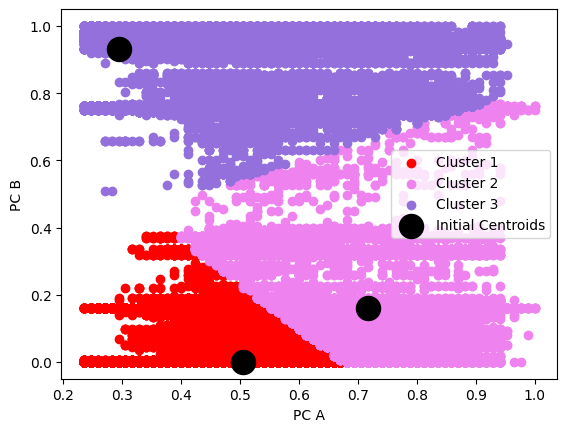


Final cluster centers:

[[0.45558622 0.11994448]
 [0.72172166 0.14566656]
 [0.40552098 0.88369289]]

Final Plot:



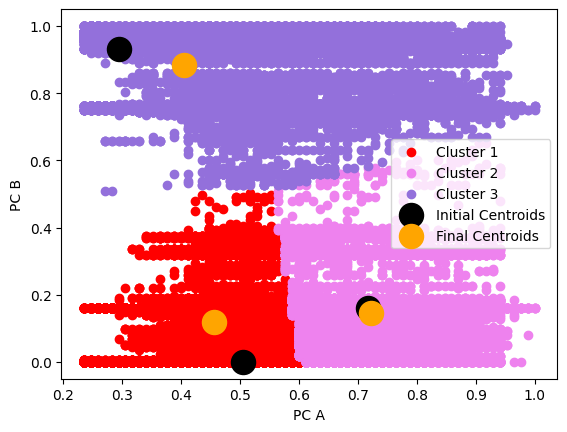

In [19]:
cluster_test1, centroid_test1 = k_means(temp, 3)


Initial Cluster Centers:

[[0.25882353 0.93251534]
 [0.48235294 0.1595092 ]
 [0.69411765 0.1595092 ]
 [0.24705882 0.95705521]]


Initial Plot



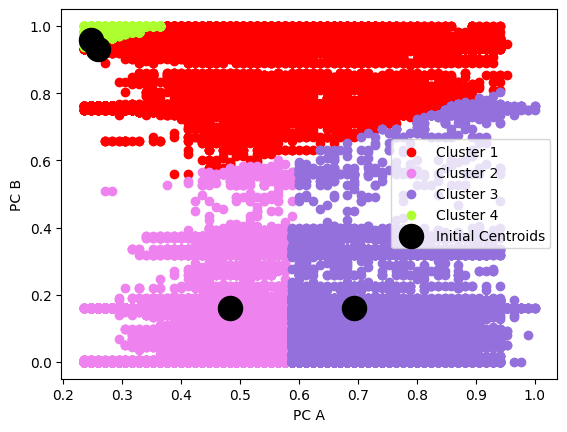


Final cluster centers:

[[0.58880482 0.78817255]
 [0.46073554 0.12133942]
 [0.72898352 0.14370045]
 [0.31147841 0.93252735]]

Final Plot:



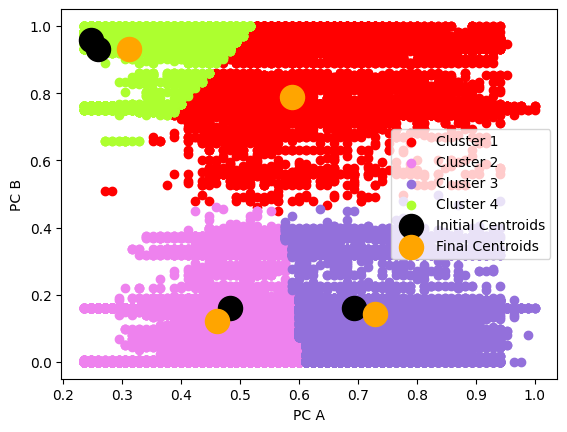

In [20]:
cluster_test1, centroid_test1 = k_means(temp, 4)


Initial Cluster Centers:

[[0.25882353 0.98159509]
 [0.28235294 0.93251534]]


Initial Plot



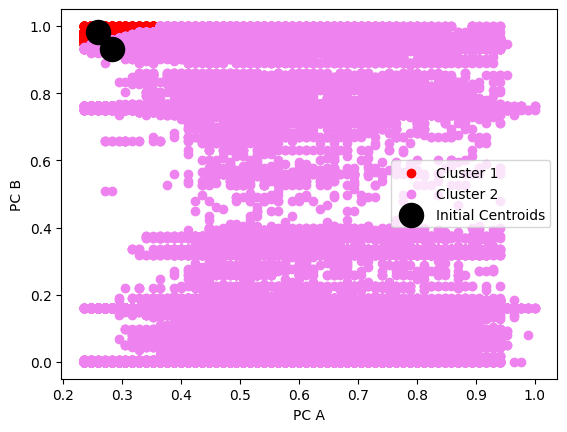


Final cluster centers:

[[0.40558738 0.88363617]
 [0.57171393 0.13098631]]

Final Plot:



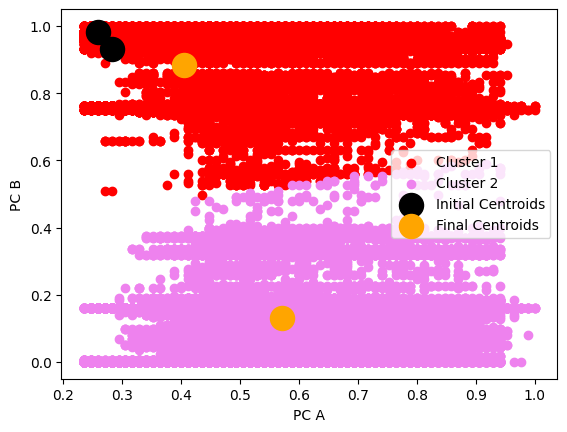

In [21]:
cluster_test1, centroid_test1 = k_means(temp, 2)